In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv( 'data3/ch2_scores_em.csv', index_col='student number')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [13]:
scores = df['english'].values
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

### 대표값
- 평균값(mean)
- 중앙값(median)
- 최빈값(mode)

#### 평균값

In [16]:
scores.sum()/len(scores)

58.38

In [17]:
scores.mean()

58.38

#### 중앙값

In [18]:
np.median(scores)

57.5

In [21]:
sorted_scores = np.sort(scores)
sorted_scores 

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [23]:
n = len(sorted_scores)
if n % 2 == 0:   # 짝수(even)
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:           # 홀수(odd)
    median = sorted_scores[(n+1)//2 - 1]
median

57.5

#### 최빈값

In [27]:
from scipy.stats import mode

In [37]:
arr = np.array([1,1,1,2,2,3])
m   = mode(arr)
print(m[0], m[1]) 

[1] [3]


In [41]:
dt, c = np.unique(arr, return_counts=True)
for x, y in zip(dt, c):
    print(x, y)

1 3
2 2
3 1


### 산포도
- 분산(variance)
- 표준편차(standard devience)

In [42]:
dt = np.array([1,2,3,4,5])
dt

array([1, 2, 3, 4, 5])

In [43]:
dt.mean()

3.0

#### 편차 : 개별데이터 - 평균값(mean)

In [45]:
d = dt - dt.mean()
d

array([-2., -1.,  0.,  1.,  2.])

In [46]:
d.mean()

0.0

In [47]:
dd = scores - scores.mean()
dd

array([-16.38,  10.62,  -2.38, -17.38,  -1.38, -10.38,   6.62,  -9.38,
         6.62,  -0.38,  11.62, -11.38,  -7.38,   5.62,   3.62,  11.62,
        12.62,   9.62,  14.62, -21.38,   6.62,   6.62,   2.62,  -6.38,
        -1.38,  -1.38,  16.62,   2.62, -11.38,  -4.38,   7.62,  -4.38,
        -4.38, -16.38, -21.38,  20.62,  -2.38,   3.62,   3.62,  -3.38,
         4.62,  -1.38,  -1.38,   8.62,  -3.38, -13.38,   7.62,  -3.38,
         5.62,   7.62])

In [48]:
dd.mean()    # 0으로 converge 

-2.5579538487363606e-15

In [53]:
aa = ( dt - dt.mean() )**2
aa

array([4., 1., 0., 1., 4.])

In [52]:
aa.mean()  # <=> aa.sum()/len(aa)

2.0

In [55]:
dt.var() 

2.0

In [57]:
np.sqrt( aa.sum() / len(aa))

1.4142135623730951

In [56]:
dt.std()  # root 2의 값

1.4142135623730951

In [67]:
deviation  = scores - scores.mean()
summary_df = pd.DataFrame( [scores, deviation] )
summary_df = summary_df.T

In [69]:
summary_df['square of devation(편차 제곱)' ] = np.square( deviation )

In [77]:
summary_df['square of devation(편차 제곱)'].sum() / len( summary_df['square of devation(편차 제곱)'] )

94.1156

In [71]:
scores.var()

94.1156

In [78]:
np.sqrt( scores.var() ) 

9.70131949788275

In [80]:
scores.std()

9.70131949788275

### 범위(range) : max - min

In [81]:
scores.max() - scores.min()

42

In [83]:
Q1 = np.percentile( scores, 25)
Q3 = np.percentile( scores, 75)
Q3-Q1

11.0

### 정규화
- 평균이 30점에서 60점인 경우와 평균이 90점인 경우 60점은 평가가 달라야 하므로 표준화 방법이 필요 하다.
- N(0, 1)로 근사하게 해줌.
- 편차(확률변수 - 평균) / 표준편차

In [90]:
dt - dt.mean()

array([4., 1., 0., 1., 4.])

In [88]:
dt.std()

1.4142135623730951

In [94]:
result = (dt - dt.mean()) / dt.std()
result

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [95]:
result.mean()

0.0

In [96]:
result.std()

0.9999999999999999

In [106]:
z = 50+10*( scores - scores.mean() )/scores.std()  # N(50, 100)으로 정규화.
z

array([33.11569885, 60.94696448, 47.54672547, 32.08491123, 48.57751309,
       39.30042454, 56.82381402, 40.33121216, 56.82381402, 49.60830071,
       61.9777521 , 38.26963693, 42.39278739, 55.7930264 , 53.73145117,
       61.9777521 , 63.00853972, 59.91617687, 65.07011495, 27.96176076,
       56.82381402, 56.82381402, 52.70066355, 43.42357501, 48.57751309,
       48.57751309, 67.13169018, 52.70066355, 38.26963693, 45.48515024,
       57.85460164, 45.48515024, 45.48515024, 33.11569885, 27.96176076,
       71.25484065, 47.54672547, 53.73145117, 53.73145117, 46.51593786,
       54.76223879, 48.57751309, 48.57751309, 58.88538925, 46.51593786,
       36.20806169, 57.85460164, 46.51593786, 55.7930264 , 57.85460164])

In [103]:
score_df = pd.DataFrame( [scores, z]).T
score_df

,0,1
0,42.0,33.115699
1,69.0,60.946964
2,56.0,47.546725
3,41.0,32.084911
4,57.0,48.577513
5,48.0,39.300425
6,65.0,56.823814
7,49.0,40.331212
8,65.0,56.823814
9,58.0,49.608301


### 도수

#### np.histogram() 의 범위
0  <= r < 10<br>
10 <= r < 20<br>
20 <= r < 30<br>
...<br>
90 <= r <= 100

In [113]:
s = [9, 10, 18, 20, 30, 45, 47, 90, 100]
np.histogram( s, bins= 10 )   # 10계급으로 분할

(array([3, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]))

In [114]:
s = [9, 10, 18, 20, 30, 45, 47, 90, 100]
np.histogram( s, bins= 10, range=(0, 100) )  # range 지정하여 10계급으로 분할.

(array([1, 2, 1, 1, 2, 0, 0, 0, 0, 2], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

#### pd.cut() 의 범위
0  < r <= 10<br>
10 < r <= 20<br>
20 < r <= 30<br>
...<br>
90 < r <= 100

In [122]:
sr = pd.Series(s)
pd.cut( sr, bins=range(0,101,10) ).value_counts().sort_index()

(0, 10]      2
(10, 20]     2
(20, 30]     1
(30, 40]     0
(40, 50]     2
(50, 60]     0
(60, 70]     0
(70, 80]     0
(80, 90]     1
(90, 100]    1
dtype: int64

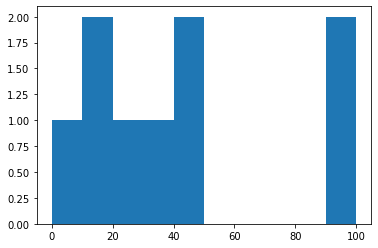

[1. 2. 1. 1. 2. 0. 0. 0. 0. 2.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [133]:
freq, r, _ = plt.hist( sr, bins=10, range=(0,100) )
plt.show()
print(freq)
print(r)

#### 빈도(frequency)

In [142]:
freq, r = np.histogram( scores, bins=10, range=(0,100) )
print( freq )
print( r )

[ 0  0  0  2  8 16 18  6  0  0]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [163]:
freq_class   = [ f'{i}~{i+10}' for i in range(0,100,10) ]
freq_dist_df = pd.DataFrame( {'frequency':freq }, index=pd.Index(freq_class, name='class') )
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


#### 각 계급의 중앙값이 계급값(class value)

In [144]:
class_value = [ (i+(i+10))//2 for i in range(0, 100, 10) ]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

#### 상대도수(relative frequency)

In [145]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

#### 누적상대도수(cumulative relative frequency)

In [147]:
cum_rel_freq = np.cumsum( rel_freq )
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

#### 도수분포표

In [161]:
freq_dist_df['class value']                   = class_value
freq_dist_df['relative frequency']            = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


### 연습문제
- 수학 점수의 도수 분포표를 그리시오.

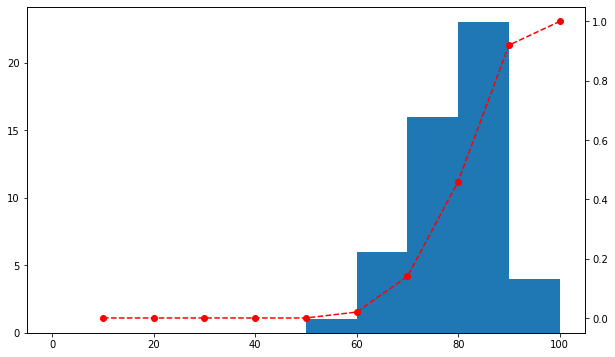

In [185]:
fig = plt.figure( figsize=(10,6) )
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
freq, r, _ = ax1.hist( pd.Series(df['mathematics'].values), bins=10, range=(0,100) )

cum_rel_freq = np.cumsum( freq / freq.sum() )
ax2.plot(r[1:],cum_rel_freq,'ro--')
plt.show()

도수 [ 0.  0.  0.  0.  0.  1.  6. 16. 23.  4.]
계급 [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


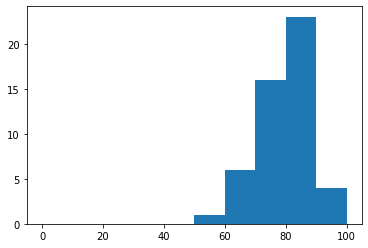

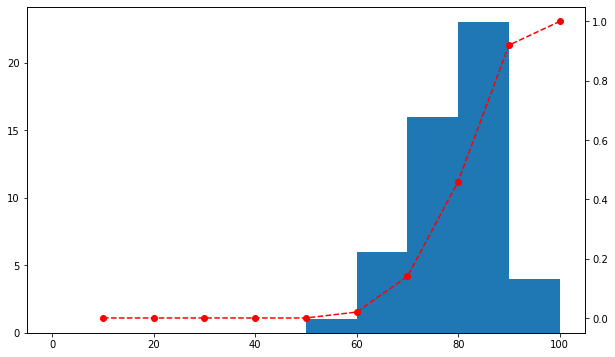

In [188]:
ms=df['mathematics'].values

mfreq, r, _ = plt.hist(ms, bins=10, range=(0,100))
print( '도수', mfreq)
print( '계급', r)

mfreq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
mfreq_dist_df = pd.DataFrame({'frequency':mfreq},index=pd.Index(mfreq_class,name='class'))
mrel_freq = freq / freq.sum()
mcum_rel_freq = np.cumsum( rel_freq )


mfreq_dist_df['class value'] = class_value # 계급의 중앙값
mfreq_dist_df['relative frequency'] = rel_freq # 상대 도수
mfreq_dist_df['cumulative relative frequency'] = cum_rel_freq # 누적 상대 도수
mfreq_dist_df = mfreq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]


fig = plt.figure( figsize=(10,6) )
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
freq, r, _ = ax1.hist( ms, bins=10, range=(0,100) )
ax2.plot( r[1:],mfreq_dist_df['cumulative relative frequency'],'ro--')
plt.show()